In [5]:
# !pip3 install pandas
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import numpy as np
import os
import json

plt.style.use('dark_background')

Parse all results and load it to DataFrame.

In [8]:
def parse_results(resultsdir, repr, lr, wd, printing=False):
    outpath = '{}_' + 'lr_{:.3f}_wd_{:.3f}'.format(lr, wd) + '_expid_{:d}_lowshotn_{:d}.json' 
    lowshotns = [1,2,5, 10]
    expids = [1,2,3,4,5]
    all_nums = np.zeros((len(lowshotns), len(expids), 4))
    for i, ei in enumerate(expids):
        for j, ln in enumerate(lowshotns):
            outfile = os.path.join(resultsdir, outpath.format(repr, ei, ln))
            with open(outfile, 'r') as f:
                out = json.load(f)
                all_nums[j,i,:] = np.array(out['accs'])*100

    means = np.mean(all_nums, axis=1)

    if printing:
        print('n \tNovel17 Novel18 All    All with prior')
        print('  \tTop-5   Top-5   Top-5  Top-5')
        
        print('='*80)

        to_print = '\n'.join([str(lowshotns[i])+'\t'+'\t'.join(['{:.2f}'.format(x) for x in y]) for i, y in enumerate(means)])
        print(to_print)
        print('='*80)
        mean_mean = np.mean(means, axis=0)
        print('mean\t'+'\t'.join(['{:.2f}'.format(x) for x in mean_mean]))
    else:
        results = means[:, 1:3].transpose()
        
        novel = {k: v for k, v in zip(lowshotns, results[0].squeeze())}
        novel['type'] = 'novel'
        novel['label'] = resultsdir
        
        all = {k: v for k, v in zip(lowshotns, results[1].squeeze())}
        all['type'] = 'all'
        all['label'] = resultsdir

        return novel, all
        

results = []
for suffix in ['CosSim', 'InnerProduct', 'PearCorr']:
    r1, r2 = parse_results(f'/tf/KGTN2/results/Wikidata/{suffix}', 'ResNet50_sgm', 0.01, 0.0001)
    results.append(r1)
    results.append(r2)


for suffix in [
    # 'KGTN/CosSim', 
    'KGTN_InnerProduct', 
    # 'KGTN_PearCorr', 
    # 'KGTN_hierarchy'
    ]:
    r1, r2 = parse_results(f'/tf/KGTN2/results/{suffix}', 'ResNet50_sgm', 0.01, 0.0001)
    results.append(r1)
    results.append(r2)

# r1, r2 = parse_results(f'/tf/KGTN2/results/baseline', 'ResNet50_sgm', 0.1, 0.0001)
# results.append(r1), results.append(r2)

df = pd.DataFrame(results)
print(df.to_latex())

\begin{tabular}{lrrrrll}
\toprule
{} &          1 &          2 &          5 &         10 &   type &                                    label \\
\midrule
0 &  56.649518 &  68.208360 &  77.311897 &  81.877814 &  novel &        /tf/KGTN2/results/Wikidata/CosSim \\
1 &  64.591716 &  73.321499 &  80.028402 &  83.437475 &    all &        /tf/KGTN2/results/Wikidata/CosSim \\
2 &  55.552412 &  67.813505 &  77.993569 &  82.151768 &  novel &  /tf/KGTN2/results/Wikidata/InnerProduct \\
3 &  64.606706 &  73.279684 &  80.550690 &  83.217357 &    all &  /tf/KGTN2/results/Wikidata/InnerProduct \\
4 &  56.841158 &  68.096463 &  77.026367 &  81.624437 &  novel &      /tf/KGTN2/results/Wikidata/PearCorr \\
5 &  64.030769 &  72.615385 &  79.530572 &  83.200000 &    all &      /tf/KGTN2/results/Wikidata/PearCorr \\
6 &  61.961415 &  71.082958 &  78.533762 &  82.482315 &  novel &      /tf/KGTN2/results/KGTN\_InnerProduct \\
7 &  68.336095 &  75.273373 &  80.923866 &  83.396450 &    all &      /tf/KGTN2/res

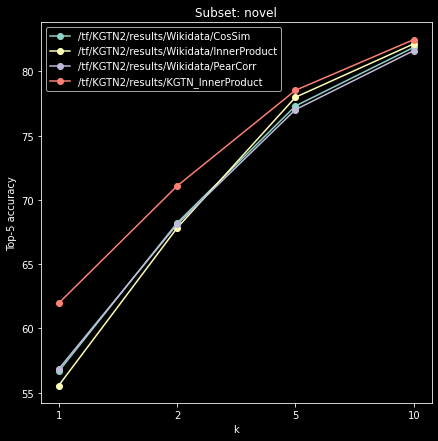

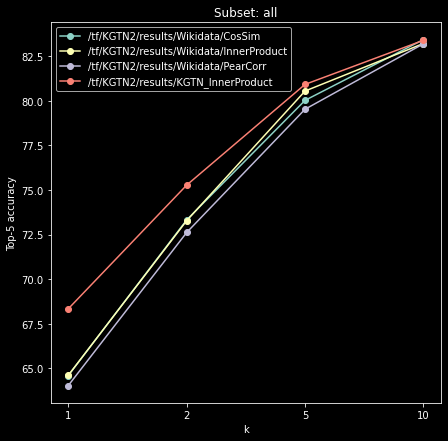

In [24]:

labels = ["1", "2", "5", "10"]

for current_type in ['novel', 'all']:
    plt.figure(figsize=(7,7))
    for x in df[df.type == current_type].iterrows():
        # print(x[1][:4].tolist())
        plt.plot(labels, x[1][:4].tolist(), marker='o', label=x[1]['label'])
        plt.legend()
        plt.title(f'Subset: {current_type}')
        plt.ylabel('Top-5 accuracy')
        plt.xlabel('k')

    plt.show()
